Intervalo [-2.5, -1]: Error [sin cambio de signo]
Intervalo [-3.5, 3]: Error [sin cambio de signo]


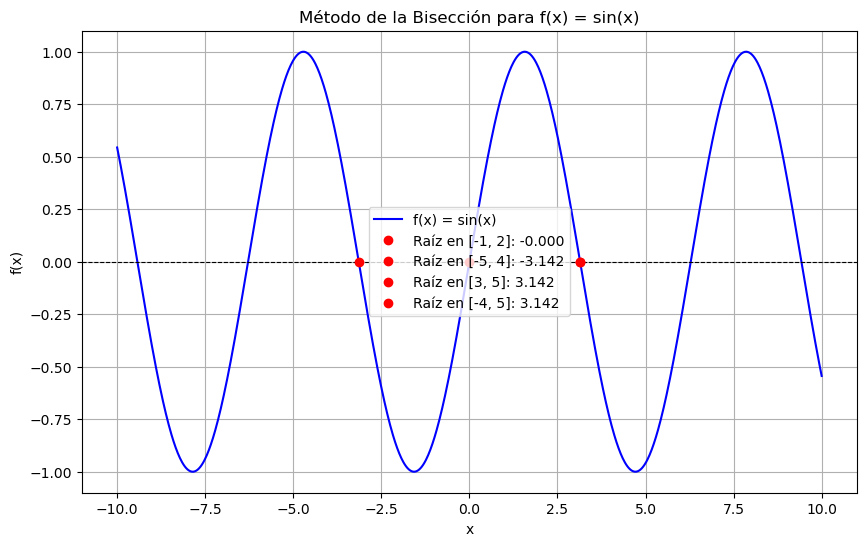

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Método de la bisección
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Método de la bisección para encontrar raíces de una función.

    Parámetros:
        f: función para la cual se busca la raíz.
        a: límite inferior del intervalo.
        b: límite superior del intervalo.
        tol: tolerancia para la convergencia (por defecto 1e-6).
        max_iter: número máximo de iteraciones (por defecto 100).

    Retorna:
        La raíz aproximada si converge o un mensaje de error si no hay cambio de signo.
    """
    if f(a) * f(b) >= 0:
        return None, "Error [sin cambio de signo]"

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2  # Punto medio
        if f(c) == 0:  # Si encontramos una raíz exacta
            return c, iter_count
        elif f(a) * f(c) < 0:
            b = c  # La raíz está en [a, c]
        else:
            a = c  # La raíz está en [c, b]
        iter_count += 1

    return (a + b) / 2, iter_count

# Función f(x) = sin(x)
def func(x):
    return np.sin(x)

# Intervalos a analizar
intervalos = [
    (-2.5, -1),
    (-1, 2),
    (-5, 4),
    (3, 5),
    (-4, 5),
    (-3.5, 3)
]

# Graficar la función y las raíces encontradas
x = np.linspace(-10, 10, 1000)
y = func(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = sin(x)", color="blue")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

# Aplicar el método de la bisección y marcar las raíces
for a, b in intervalos:
    raiz, mensaje = bisection_method(func, a, b)
    if raiz is not None:
        plt.plot(raiz, func(raiz), 'ro', label=f'Raíz en [{a}, {b}]: {raiz:.3f}')
    else:
        print(f"Intervalo [{a}, {b}]: {mensaje}")

# Configuración de la gráfica
plt.title("Método de la Bisección para f(x) = sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()
